# Underfitting and Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(500)

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

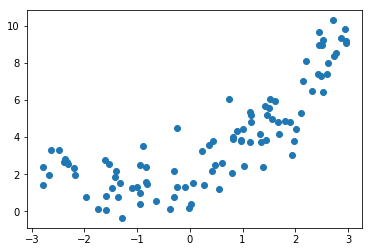

In [3]:
plt.scatter(x, y)

# Use LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

/Users/twu/.pyenv/versions/anaconda3-5.2.0/envs/datascience/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.6232827560031908

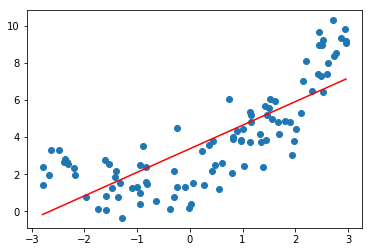

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)  # 均方误差

2.7469819159110687

# Use Polynomial Regression

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [9]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [10]:
poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [11]:
y_predict2 = poly_reg.predict(X)

In [12]:
mean_squared_error(y, y_predict2)

1.1966832572343673

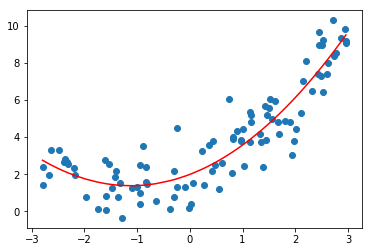

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

In [14]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y_predict10 = poly10_reg.predict(X)
mean_squared_error(y, y_predict10)

1.0109924846848057

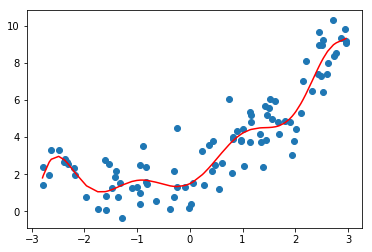

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict10[np.argsort(x)], color='r')

In [16]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y_predict100 = poly100_reg.predict(X)
mean_squared_error(y, y_predict100)

0.5463917798819606

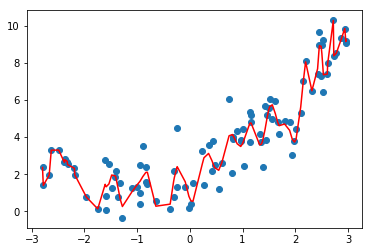

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict100[np.argsort(x)], color='r')

[-3, 3, -1, 10]

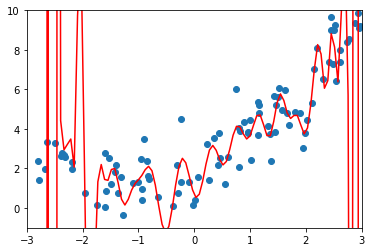

In [18]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])